In [228]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.fits as pf
import warnings
import matplotlib.cm as cm
from astropy.table import Table, vstack
warnings.filterwarnings('ignore')

In [217]:
filename = '80613_BGS_ANYzinfo_wVI.fits'
dir = '/global/cfs/cdirs/desi/survey/catalogs/SV1/redshift_comps/cascades/3.1/BGS_ANY/'

In [218]:
data = pf.open(dir+filename)
catalog = data[1].data

Selecting about main survey exposures with 
150<EFFTIME_BRIGHT<200 & 
VI quaility>=2.5 (~10 times deeper) so that we can trust the VI redshift

In [220]:
search = np.where((catalog['EFFTIME_BRIGHT']>150) & 
                  (catalog['EFFTIME_BRIGHT']<200) & 
                  (catalog['subset']!='all') & 
                  (catalog['subset']!='deep') & 
                  (catalog['zwarn']<=4) & 
                  (catalog['best_quality']>=2.5))
short_catalog = catalog[search[0]]
print(len(short_catalog))

9572


Getting redshift difference information and magnitudes

In [221]:
dz=abs(short_catalog['best_z']-short_catalog['Z'])/(1+short_catalog['best_z'])
zfibermag=-2.5*np.log10(short_catalog['FIBERFLUX_Z'])+22.5-1.211*short_catalog['EBV']
rfibermag=-2.5*np.log10(short_catalog['FIBERFLUX_R'])+22.5-2.165*short_catalog['EBV']
rmag=-2.5*np.log10(short_catalog['FLUX_R'])+22.5-2.165*short_catalog['EBV']
zmag=-2.5*np.log10(short_catalog['FLUX_Z'])+22.5-1.211*short_catalog['EBV']
gmag=-2.5*np.log10(short_catalog['FLUX_G'])+22.5-3.214*short_catalog['EBV']
w1mag=-2.5*np.log10(short_catalog['FLUX_W1'])+22.5-0.184*short_catalog['EBV']
color_mag=(zmag-w1mag)-1.2*(gmag-rmag)+1.2

Giving a mark for inconsistent redshifts. 
color_code==1 -> the short exposure redshifts are consistent with VI best z
color_code==0 -> inconsistent

In [206]:
color_code = dz*0.0+1
search_dz = np.where(dz>0.0033)
color_code[search_dz[0]]=0

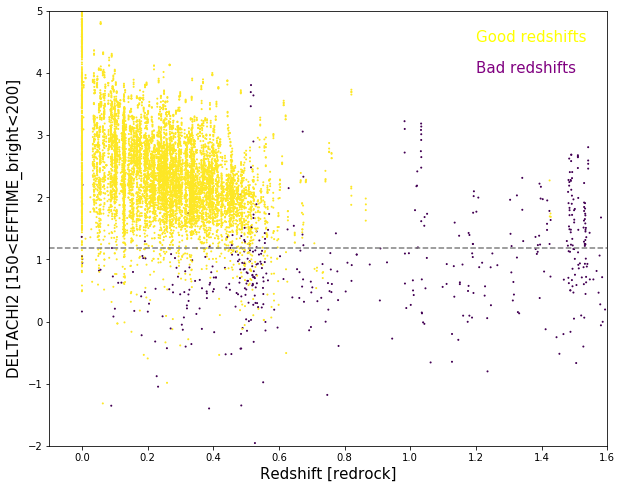

In [251]:
plt.figure(figsize=(10,8))
plt.scatter(short_catalog['Z'],np.log10(short_catalog['DELTACHI2']),c=color_code,s=1)#,cmap=cm.jet_r)
plt.xlim(-0.1,1.6)
plt.ylim(-2,5)
plt.text(1.2,4.5,'Good redshifts',fontsize=15,color='yellow')
plt.text(1.2,4,'Bad redshifts',fontsize=15,color='purple')
plt.ylabel('DELTACHI2 [150<EFFTIME_bright<200]',fontsize=15)
plt.xlabel('Redshift [redrock]',fontsize=15)
plt.axhline(np.log10(15),ls='--',color='grey')

Text(0, 0.5, '(z-w1)-1.2(g-r)+1.2')

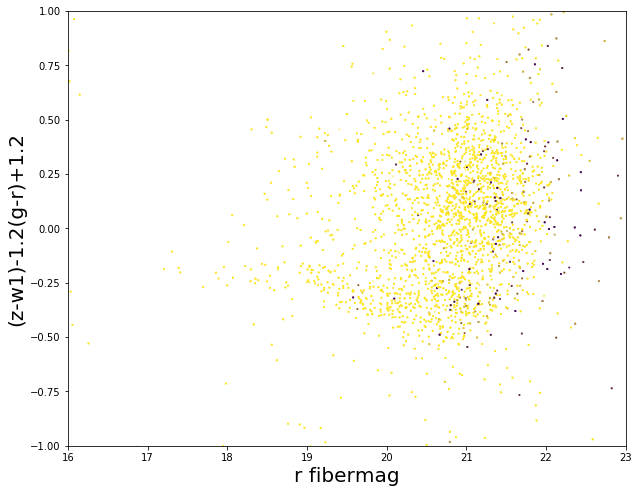

In [238]:
plt.figure(figsize=(10,8))
plt.scatter(rfibermag,color_mag,s=1,alpha=0.5,c=color_code)
plt.xlim(16,23)
plt.ylim(-1,1)
plt.xlabel('r fibermag',fontsize=20)
plt.ylabel('(z-w1)-1.2(g-r)+1.2',fontsize=20)

Selecting deltachi2>15 from short exposures and redshfit<0.9

In [253]:
search_deltachi2 = np.where((short_catalog['DELTACHI2']>15) & 
                  (short_catalog['Z']<0.9))
                  #(((rfibermag<21.5) & (color_mag>0)) | 
                  #((rfibermag<20.75) & (color_mag<0))))

In [254]:
selection = color_code[search_deltachi2[0]]

In [255]:
print('Redshift purity:',len(np.where(selection==1)[0])/len(selection))

Redshift purity: 0.9949977262391997
